In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
# データセット用意
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
#　概要確認
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# 欠損値確認
a = df.isnull().sum()
b = test.isnull().sum()

print(a[a > 0]); print(b[b > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64
Age       86
Fare       1
Cabin    327
dtype: int64


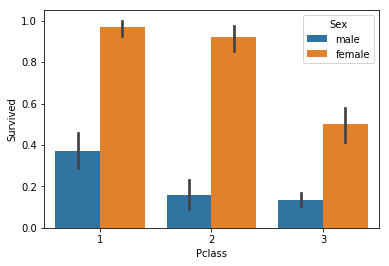

In [105]:
# おまけ、綺麗に描画される話
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)

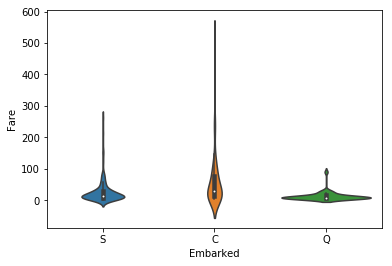

In [106]:
sns.violinplot(x="Embarked", y="Fare", data=df)

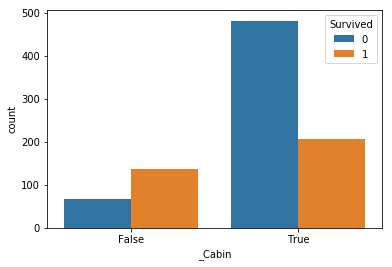

In [107]:
# Cabin の欠損値調査
df["_Cabin"] = df["Cabin"].isnull()
sns.countplot("_Cabin", data=df, hue="Survived")

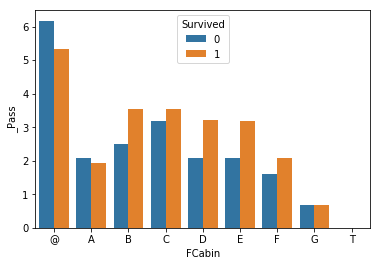

In [108]:
# Cabin の前2文字を使用
df["_Cabin"] = df.Cabin.fillna("@")
test["_Cabin"] = test.Cabin.fillna("@")

df["FCabin"] = df._Cabin.str[:1]
test["FCabin"] = test._Cabin.str[:1]

# Embarked は最頻値で埋める
df["Embarked"] = df.Embarked.fillna("S")

# Fare　は中央値で埋める
test["Fare"] = df.Fare.fillna(df.Fare.median())

df = df.drop(columns="_Cabin")
test = test.drop(columns="_Cabin")

# Cabin 処理後、対数表示してみる
a = df.groupby(["FCabin", "Survived"], as_index=False).count()
a["_Pass"] = np.log(a["PassengerId"])
sns.barplot(x="FCabin", y="_Pass", data=a, hue="Survived")

In [109]:
# 敬称取り出して確認
a = df.Name.str.extract('(?P<Honor>[A-Za-z]+)\.')
a["count"] = 1
print(a.groupby("Honor").count())

          count
Honor          
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1


[Text(0, 0, 'Mr'),
 Text(0, 0, 'Mrs'),
 Text(0, 0, 'Miss'),
 Text(0, 0, 'Master'),
 Text(0, 0, 'Don'),
 Text(0, 0, 'Rev'),
 Text(0, 0, 'Dr'),
 Text(0, 0, 'Major'),
 Text(0, 0, 'Lady'),
 Text(0, 0, 'Sir'),
 Text(0, 0, 'Col'),
 Text(0, 0, 'Capt'),
 Text(0, 0, 'Countess'),
 Text(0, 0, 'Jonkheer')]

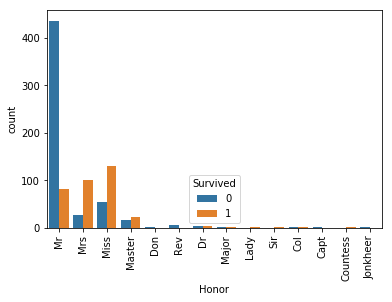

In [110]:
# 敬称取り出し
df["Honor"] = df.Name.str.extract('(?P<Honor>[A-Za-z]+)\.')
test["Honor"] = test.Name.str.extract('(?P<Honor>[A-Za-z]+)\.')

# 簡易なものをまとめる
df['Honor'].replace('Mlle', 'Miss',inplace=True)
df['Honor'].replace('Ms', 'Miss',inplace=True)
df['Honor'].replace('Mme', 'Mrs',inplace=True)

test['Honor'].replace('Mlle', 'Miss',inplace=True)
test['Honor'].replace('Ms', 'Miss',inplace=True)
test['Honor'].replace('Mme', 'Mrs',inplace=True)

# データ確認してみる
ax = sns.countplot("Honor", data=df, hue="Survived")
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")

In [111]:
# Master かそうでないかで Age の穴埋め方針を変える
df["IsChild"] = df["Honor"] == 'Master'
test["IsChild"] = test["Honor"] == 'Master'

x = df[df["IsChild"] == False]["Age"].mean()
y = df[df["IsChild"] == True]["Age"].median()
print("Adult: ", x, "Child: ", y)

Adult:  31.033185840707965 Child:  3.5


In [112]:
# 欠損値補完
df["FAge"] = df["Age"]
test["FAge"] = test["Age"]

df.loc[(df["FAge"].isnull() & (df["IsChild"] == False)), "FAge"] = 29
test.loc[(test["FAge"].isnull() & (test["IsChild"] == False)), "FAge"] = 29

df.loc[(df["FAge"].isnull() & (df["IsChild"] == True)), "FAge"] = 3.5
test.loc[(test["FAge"].isnull() & (test["IsChild"] == True)), "FAge"] = 3.5

In [113]:
# Fareを10分割した特徴量を作成
for dfs in [df, test]:
    dfs.loc[dfs['Fare'] <= 51, 'Fare_grade'] = 0
    dfs.loc[(dfs['Fare'] > 51) & (dfs['Fare'] <= 102), 'Fare_grade'] = 1
    dfs.loc[(dfs['Fare'] > 102) & (dfs['Fare'] <= 153), 'Fare_grade']   = 2
    dfs.loc[(dfs['Fare'] > 153) & (dfs['Fare'] <= 204), 'Fare_grade']   = 3
    dfs.loc[(dfs['Fare'] > 204) & (dfs['Fare'] <= 256), 'Fare_grade']   = 4
    dfs.loc[(dfs['Fare'] > 256) & (dfs['Fare'] <= 307), 'Fare_grade']   = 5
    dfs.loc[(dfs['Fare'] > 307) & (dfs['Fare'] <= 358), 'Fare_grade']   = 6
    dfs.loc[(dfs['Fare'] > 358) & (dfs['Fare'] <= 409), 'Fare_grade']   = 7
    dfs.loc[(dfs['Fare'] > 409) & (dfs['Fare'] <= 461), 'Fare_grade']   = 8
    dfs.loc[ dfs['Fare'] > 461, 'Fare_grade'] = 9
    dfs['Fare_grade'] = dfs['Fare_grade'].astype(int)


In [114]:
# Ageについても１０分割した特徴量を作成
for dfs in [df, test]:
    dfs.loc[ dfs['FAge'] <= 8, 'Age_grade'] = 0
    dfs.loc[(dfs['FAge'] > 8) & (dfs['FAge'] <= 16), 'Age_grade'] = 1
    dfs.loc[(dfs['FAge'] > 16) & (dfs['FAge'] <= 24), 'Age_grade'] = 2
    dfs.loc[(dfs['FAge'] > 24) & (dfs['FAge'] <= 32), 'Age_grade'] = 3
    dfs.loc[(dfs['FAge'] > 32) & (dfs['FAge'] <= 40), 'Age_grade'] = 4
    dfs.loc[(dfs['FAge'] > 40) & (dfs['FAge'] <= 48), 'Age_grade'] = 5
    dfs.loc[(dfs['FAge'] > 48) & (dfs['FAge'] <= 56), 'Age_grade'] = 6
    dfs.loc[(dfs['FAge'] > 56) & (dfs['FAge'] <= 64), 'Age_grade'] = 7
    dfs.loc[(dfs['FAge'] > 64) & (dfs['FAge'] <= 72), 'Age_grade'] = 8
    dfs.loc[(dfs['FAge'] > 72) & (dfs['FAge'] <= 80), 'Age_grade'] = 9
    dfs['Age_grade'] = dfs['Age_grade'].astype(int)


[Text(0, 0, 'A'),
 Text(0, 0, 'P'),
 Text(0, 0, 'S'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, 'C'),
 Text(0, 0, '7'),
 Text(0, 0, 'W'),
 Text(0, 0, '4'),
 Text(0, 0, 'F'),
 Text(0, 0, 'L'),
 Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '8')]

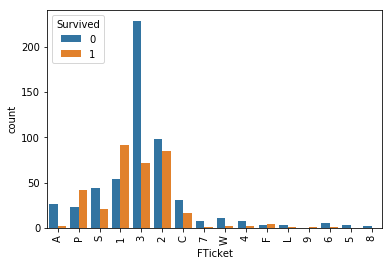

In [115]:
# Ticket 前2文字切り取り
df["FTicket"] = df["Ticket"].str[:1]
test["FTicket"] = test["Ticket"].str[:1]

ax = sns.countplot("FTicket", data=df, hue="Survived")
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")

In [116]:
# 試行錯誤のため、別変数に書き出す
_df = df
_test = test

# おまじない
_df["Family"] = _df["SibSp"] + _df["Parch"]
_test["Family"] = _test["SibSp"] + _test["Parch"]

# Label Encoding
from sklearn import preprocessing

for dfs in [_df, _test]:
    for column in ["Honor", "FTicket", "FCabin"]:
        le = preprocessing.LabelEncoder()
        le.fit(dfs[column])
        dfs[column] = le.transform(dfs[column])

# OneHot Encoding の準備
_df["Pclass"] = _df.Pclass.astype("category")
_test["Pclass"] = _df.Pclass.astype("category")

# 不要なカラムの整理
_df = _df.drop(columns=["PassengerId", "Name", "Ticket", "Age", "FAge", "Cabin", "Fare"])
_test = _test.drop(columns=["PassengerId", "Name", "Ticket", "Age", "FAge", "Cabin", "Fare"])

In [117]:
#a = sns.pairplot(_df, hue="Survived", diag_kind="hist")

In [118]:
#a.savefig("pairplot.png")

In [119]:
# OneHot Encoding
_df = pd.get_dummies(_df)
_test = pd.get_dummies(_test)
_df.head()

_df.corr()

,Survived,SibSp,Parch,FCabin,Honor,IsChild,Fare_grade,Age_grade,FTicket,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.035322,0.081629,0.287944,-0.059374,0.085221,0.232892,-0.070315,-0.036178,0.016639,0.285904,0.093349,-0.322308,0.543351,-0.543351,0.168240,0.003650,-0.149683
SibSp,-0.035322,1.000000,0.414838,-0.031973,-0.128959,0.349559,0.097544,-0.245453,0.049331,0.890712,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.414838,1.000000,0.037621,-0.035228,0.267344,0.146110,-0.177641,0.015628,0.783111,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.011069,-0.081228,0.060814
FCabin,0.287944,-0.031973,0.037621,1.000000,-0.006902,-0.007043,0.314194,0.176709,-0.040996,-0.003057,0.604888,-0.102715,-0.437580,0.143517,-0.143517,0.120044,-0.107526,-0.037498
Honor,-0.059374,-0.128959,-0.035228,-0.006902,1.000000,-0.336084,-0.008823,0.175579,0.023040,-0.105739,-0.096810,0.084205,0.014881,0.004042,-0.004042,-0.012119,-0.080177,0.061072
IsChild,0.085221,0.349559,0.267344,-0.007043,-0.336084,1.000000,-0.038405,-0.388802,-0.028468,0.372472,-0.084700,0.009903,0.064918,-0.159934,0.159934,-0.035225,0.010478,0.024264
Fare_grade,0.232892,0.097544,0.146110,0.314194,-0.008823,-0.038405,1.000000,0.099532,0.137205,0.139662,0.542948,-0.152820,-0.343433,0.154203,-0.154203,0.246540,-0.096192,-0.155445
Age_grade,-0.070315,-0.245453,-0.177641,0.176709,0.175579,-0.388802,0.099532,1.000000,0.002071,-0.256505,0.315776,0.021708,-0.289742,-0.081354,0.081354,0.023965,-0.029239,-0.002594
FTicket,-0.036178,0.049331,0.015628,-0.040996,0.023040,-0.028468,0.137205,0.002071,1.000000,0.041523,-0.012994,0.034277,-0.016701,-0.031341,0.031341,0.108996,-0.138848,-0.008108
Family,0.016639,0.890712,0.783111,-0.003057,-0.105739,0.372472,0.139662,-0.256505,0.041523,1.000000,-0.046114,-0.038594,0.071142,0.200988,-0.200988,-0.046215,-0.058592,0.077359


In [120]:
_test.columns

Index(['SibSp', 'Parch', 'FCabin', 'Honor', 'IsChild', 'Fare_grade',
       'Age_grade', 'FTicket', 'Family', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [121]:
_df.columns

Index(['Survived', 'SibSp', 'Parch', 'FCabin', 'Honor', 'IsChild',
       'Fare_grade', 'Age_grade', 'FTicket', 'Family', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [122]:
# RandomForest にグリッドサーチを適用
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[i for i in range(10,100,10)],
    "criterion":["gini","entropy"],
    "max_depth":[i for i in range(1,6,1)],
     'min_samples_split': [2, 4, 10,12,16],
    "random_state":[3],
}

x = _df.drop(columns=["Survived"])
y = df["Survived"]

model = GridSearchCV(RandomForestClassifier(), parameters)
model_fit = model.fit(x, y)
predictor = model_fit.best_estimator_

/Users/y.nakamori/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [123]:
# 予測器に通す
survivor = predictor.predict(_test)
survivor = pd.Series(survivor)

# 提出用に体裁を整える
_survivor = pd.concat([test.PassengerId, survivor], axis=1)
_survivor = _survivor.rename(columns={0: 'Survived'})
_survivor.to_csv("prediction.csv", index=False)

In [124]:
_x = predictor.feature_importances_
_y = _test.columns
print(pd.Series(_x, _y))

SibSp         0.034593
Parch         0.012409
FCabin        0.054209
Honor         0.098892
IsChild       0.019729
Fare_grade    0.027215
Age_grade     0.038002
FTicket       0.043400
Family        0.049232
Pclass_1      0.039055
Pclass_2      0.016111
Pclass_3      0.070371
Sex_female    0.230494
Sex_male      0.247293
Embarked_C    0.007305
Embarked_Q    0.003922
Embarked_S    0.007769
dtype: float64


In [125]:
_df.head()

,Survived,SibSp,Parch,FCabin,Honor,IsChild,Fare_grade,Age_grade,FTicket,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,10,False,0,2,9,1,0,0,1,0,1,0,0,1
1,1,1,0,3,11,False,1,4,13,1,1,0,0,1,0,1,0,0
2,1,0,0,0,9,False,0,3,14,0,0,0,1,1,0,0,0,1
3,1,1,0,3,11,False,1,4,0,1,1,0,0,1,0,0,0,1
4,0,0,0,0,10,False,0,4,2,0,0,0,1,0,1,0,0,1


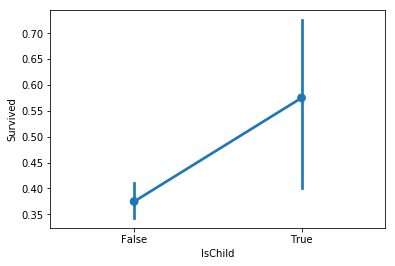

In [126]:
sns.pointplot(x="IsChild", data=_df, y="Survived")

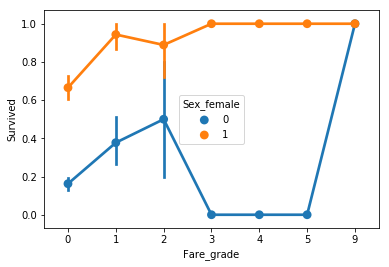

In [127]:
sns.pointplot(x="Fare_grade", data=_df, y="Survived", hue="Sex_female")

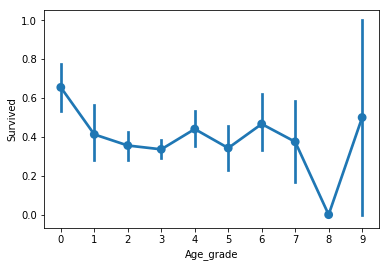

In [128]:
sns.pointplot(x="Age_grade", y="Survived", data=_df)

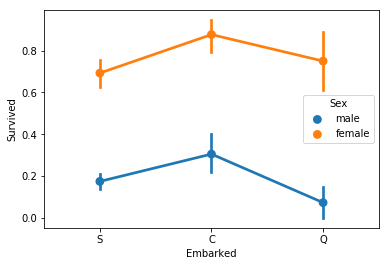

In [129]:
sns.pointplot(x="Embarked", y="Survived", hue="Sex", data=df)

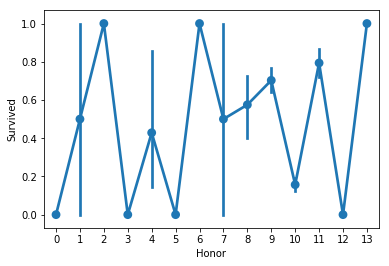

In [130]:
sns.pointplot(x="Honor", y="Survived", data=_df)

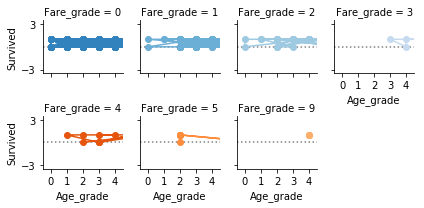

In [131]:
grid = sns.FacetGrid(
    _df,
    col="Fare_grade",
    hue="Fare_grade",
    palette="tab20c",
    col_wrap=4,
    height=1.5)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, "Age_grade", "Survived", marker="o")
grid.set(xticks=np.arange(5), yticks=[-3, 3],
        xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
grid.fig.tight_layout(w_pad=1)